In [1]:
from matplotlib import pyplot as plt
import numpy as np 
from os.path import join, abspath
from hammer import dm 
from time import time
import pandas as pd
root_dir = abspath(join('..', '..'))
import sys
sys.path.append(root_dir)
import vaex
from scipy.stats import norm
from utils import plot_chain, plot_corner, style, concat
from scipy.integrate import simps

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
style('seaborn-talk')

In [4]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir 

'/home2/s20321005/Thesis-Project/Data'

In [5]:
name = "Baryon"
baryon_dir = join(root_data_dir, name)
baryon_dir

'/home2/s20321005/Thesis-Project/Data/Baryon'

In [6]:
# load baryons components
df_baryon = vaex.open(join(baryon_dir, "baryon.hdf5"))
df_baryon

#,components,rho,e_rho,sigma_z,e_sigma_z
0,Molecular gas (H2),0.0104,0.00312,3.7,0.2
1,Cold atomic gas (HI(1)),0.0277,0.00554,7.1,0.5
2,Warm atomic gas (HI(2)),0.0073,0.0007,22.1,2.4
3,Hot ionized gas (HII),0.0005,3e-05,39.0,4.0
4,Giant stars,0.0006,6e-05,15.5,1.6
...,...,...,...,...,...
7,4 < MV < 5,0.0029,0.00029,18.0,1.8
8,5 < MV < 8,0.0072,0.00072,18.5,1.9
9,MV > 8,0.0216,0.0028,18.5,4.0
10,White dwarfs,0.0056,0.001,20.0,5.0


In [7]:
# Baryonic density, check table 1 from this https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.081101
rhob = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s
rhoDM = 0.02
log_nu0 = 0
R = 3.4E-3
zsun = 30

theta = concat(rhob, sigmaz, rhoDM, log_nu0, R, zsun)

w0 = -7.
sigma1 = 10.
sigma2 = 15.
log_sigmaw = np.log(sigma1)
q_sigmaw = sigma1/sigma2
a1 = 0.9
a2 = 0.1
log_a = np.log(a1)
q_a = a2/a1
psi = concat(w0, log_sigmaw, q_sigmaw, log_a, q_a)
theta.shape, psi.shape

((28,), (5,))

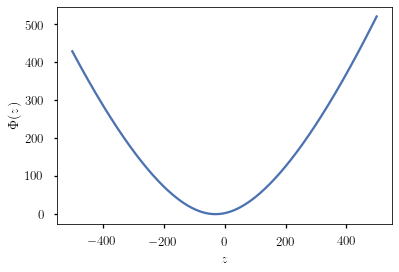

In [8]:
z_start = -500
z_end = 500
dz = 1.

z = np.arange(z_start, z_end, dz)

phi = dm.potential(z, theta, dz)

plt.figure(figsize=(6, 4))
plt.plot(z, phi)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()


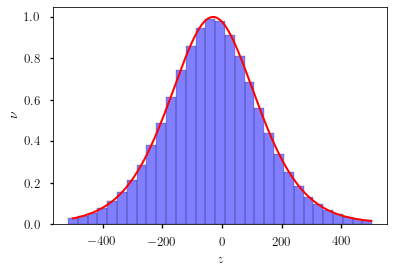

In [9]:
z = np.linspace(-500, 500, 305)
dz = z[10] - z[0]
fz = dm.fz(z[::10], theta, psi, dz)
fz_smooth = dm.fz(z, theta, psi, dz/10)
plt.figure(figsize=(6, 4))
plt.bar(z[::10], fz, width=dz, color='b', alpha=0.5, ec="k")
plt.plot(z, fz_smooth, color='r', lw=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu$')
plt.show()

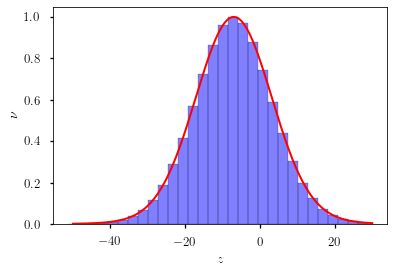

In [10]:
w = np.linspace(-50, 30, 300)
dw = w[10] - w[0]
fw = dm.fw(w[::10], theta, psi, dz)
fw_smooth = dm.fw(w, theta, psi, dz)
plt.figure(figsize=(6, 4))
plt.bar(w[::10], fw, width=dw, color='b', alpha=0.5, ec="k")
plt.plot(w, fw_smooth, color='r', lw=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu$')
plt.show()

## Sample

In [28]:
# Baryonic density, check table 1 from this https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.081101
rhob = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s
rhoDM = 0.02
log_nu0 = 0
R = 3.4E-3
zsun = 30

theta = concat(rhob, sigmaz, rhoDM, log_nu0, R, zsun)

w0 = -7.
sigma1 = 10.
sigma2 = 15.
log_sigmaw = np.log(sigma1)
q_sigmaw = sigma1/sigma2
a1 = 0.9
a2 = 0.4
atot = a1 + a2
a1 = a1/atot
a2 = a2/atot
log_a = np.log(a1)
q_a = a2/a1
psi = concat(w0, log_sigmaw, q_sigmaw, log_a, q_a)
theta.shape, psi.shape
psi

array([-7.        ,  2.30258509,  0.66666667, -0.36772478,  0.44444444])

In [29]:
N = 5000

z = np.random.randn(N)*200
w = np.random.randn(N)*15
dz = 1
pos = np.array([z, w]).T
pos.shape

(5000, 2)

In [30]:
pot = dm.fzw(pos, theta, psi, dz)
pot.shape

(5000,)

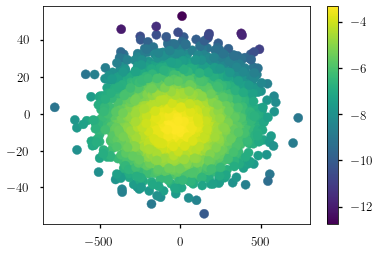

In [31]:
plt.figure(figsize=(6, 4))
plt.scatter(pos[:, 0], pos[:, 1], c=np.log(pot), cmap='viridis')
plt.colorbar()

In [32]:
# number of walkers
N = 16

z = np.random.randn(N)*200
w = np.random.randn(N)*20
dz = 1
pos = np.array([z, w]).T
pos.shape

(16, 2)

In [33]:
nwalkers = pos.shape[0]
ndim = pos.shape[1]

t0 = time()
chain = dm.sample(20_000, nwalkers, pos, theta, psi, dz=1., verbose=True, parallel=True)
print(time() - t0, "s")

53.15067768096924 s


2it [00:00, 61.64it/s]


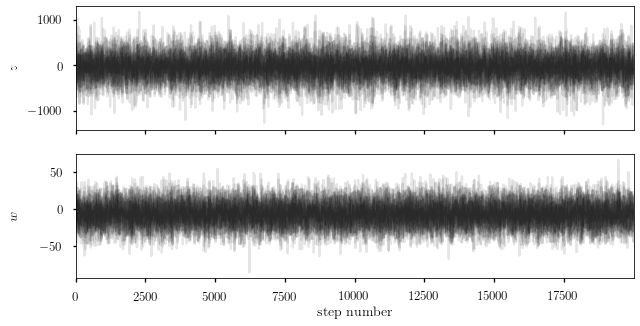

In [34]:
plot_chain(chain, labels=[r'$z$', r'$w$'], figsize=(10, 5))

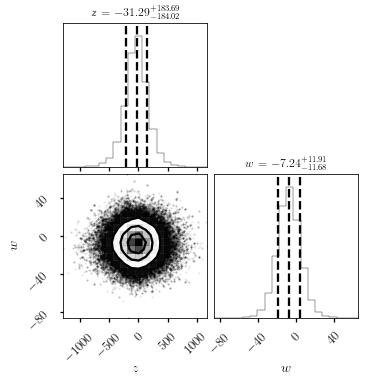

In [35]:
plot_corner(chain, burn=100, labels=[r'$z$', r'$w$'])

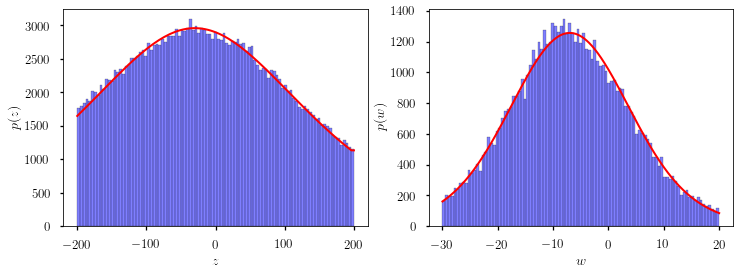

In [36]:
z_sample = chain[:, :, 0].flatten()
w_sample = chain[:, :, 1].flatten()
mask = (z_sample > -50) & (z_sample < 50)
w_sample = w_sample[mask]

z_edge = np.linspace(-200, 200, 100)
dz = z_edge[1] - z_edge[0]
z_mid = (z_edge[:-1] + z_edge[1:])/2
z_num, _ = np.histogram(z_sample, bins=z_edge)
ztot = simps(z_num, z_mid)
zs = np.linspace(z_edge.min(), z_edge.max(), 1000)
fz = dm.fz(zs, theta, psi, dz)
fz = fz * ztot / simps(fz, zs)

w_edge = np.linspace(-30, 20, 100)
dw = w_edge[1] - w_edge[0]
w_mid = (w_edge[:-1] + w_edge[1:])/2
w_num, _ = np.histogram(w_sample, bins=w_edge)
wtot = simps(w_num, w_mid)
ws = np.linspace(w_edge.min(), w_edge.max(), 1000)
fw = dm.fw(ws, theta, psi, dw)
fw = fw * wtot / simps(fw, ws)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].bar(z_mid, z_num, width=dz, color='b', alpha=0.5, ec="k")
axes[0].plot(zs, fz, color='r', lw=2)
axes[0].set_xlabel(r'$z$')
axes[0].set_ylabel(r'$p(z)$')
axes[1].bar(w_mid, w_num, width=dw, color='b', alpha=0.5, ec="k")
axes[1].plot(ws, fw, color='r', lw=2)
axes[1].set_xlabel(r'$w$')
axes[1].set_ylabel(r'$p(w)$')
plt.show()

# different $z$, $N=5000$

figure out the size of the generated data, using gaussian distribution

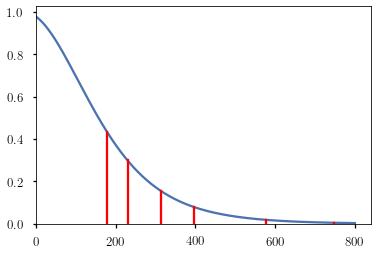

[178. 230. 314. 396. 576. 747.]


In [41]:
theta = concat(rhob, sigmaz, rhoDM, log_nu0, R, zsun)
psi = concat(w0, log_sigmaw, q_sigmaw, log_a, q_a)
dz = 0.1
z = np.arange(0, 800, dz)
fz = dm.fz(z, theta, psi, dz)
cum_fz = np.cumsum(fz)*dz
cum_fz /= cum_fz[-1]
alpha_level = [.7, 0.8, 0.9, 0.95, 0.99, 0.999]
num = len(alpha_level)
zb = np.empty(num)
args = np.empty(num, dtype=int)
for i, alp in enumerate(alpha_level):
    arg_z = np.argmin(np.abs(cum_fz - alp)).astype(int)
    zbi= z[arg_z]
    zb[i] = np.round(zbi)
    args[i] = arg_z

plt.plot(z, fz)
for i in range(num):
    plt.plot([zb[i], zb[i]], [0, fz[args[i]]], 'r')
plt.xlim(0)
plt.ylim(0)
plt.show()
print(zb)

generate...

5000


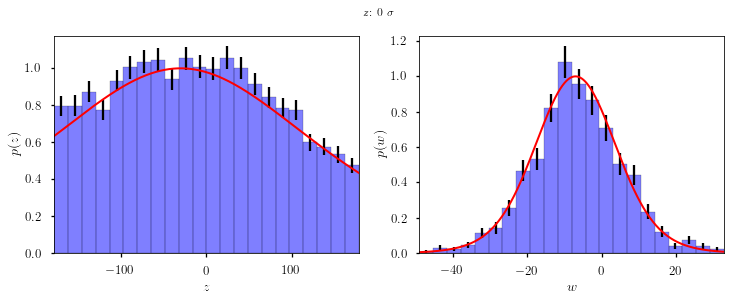

[-169.60475364 -153.43811858 -137.27148353 -121.10484847 -104.93821342
  -88.77157836  -72.60494331  -56.43830825  -40.2716732   -24.10503814
   -7.93840309    8.22823196   24.39486702   40.56150207   56.72813713
   72.89477218   89.06140724  105.22804229  121.39467735  137.5613124
  153.72794746  169.89458251]
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_178.hdf5 and w_178.hdf5
5000


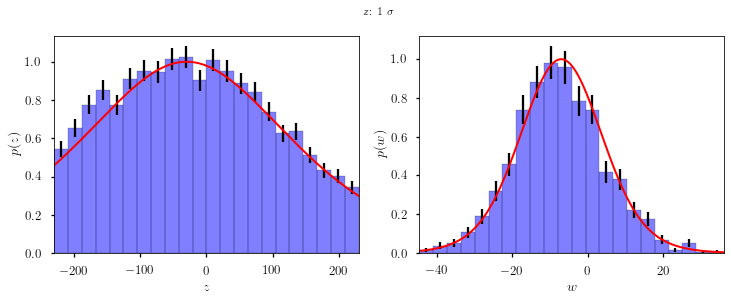

[-219.54590017 -198.64352476 -177.74114935 -156.83877394 -135.93639853
 -115.03402313  -94.13164772  -73.22927231  -52.3268969   -31.42452149
  -10.52214608   10.38022933   31.28260474   52.18498015   73.08735556
   93.98973097  114.89210638  135.79448179  156.6968572   177.59923261
  198.50160802  219.40398343]
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_230.hdf5 and w_230.hdf5
5000


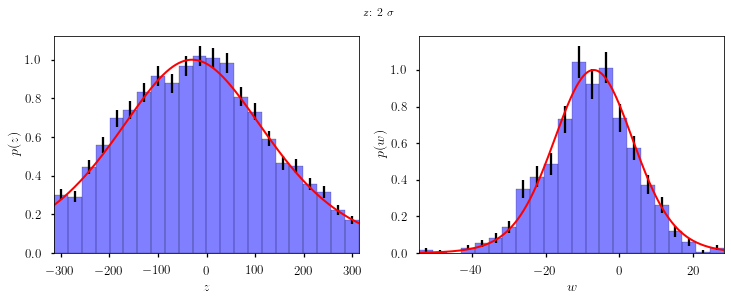

[-299.52746133 -271.03050803 -242.53355472 -214.03660141 -185.5396481
 -157.04269479 -128.54574148 -100.04878818  -71.55183487  -43.05488156
  -14.55792825   13.93902506   42.43597837   70.93293167   99.42988498
  127.92683829  156.4237916   184.92074491  213.41769822  241.91465153
  270.41160483  298.90855814]
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_314.hdf5 and w_314.hdf5
5000


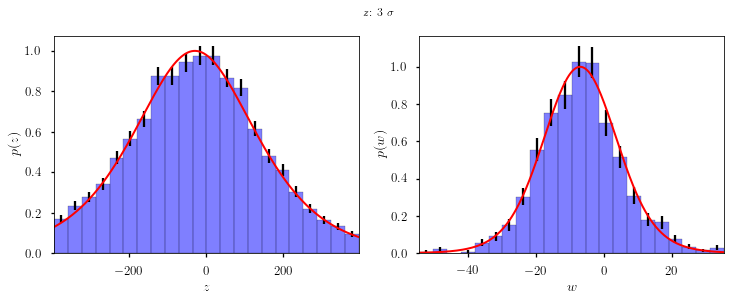

[-377.54587464 -341.59698691 -305.64809918 -269.69921145 -233.75032372
 -197.80143599 -161.85254826 -125.90366053  -89.9547728   -54.00588507
  -18.05699734   17.89189039   53.84077812   89.78966585  125.73855358
  161.68744131  197.63632905  233.58521678  269.53410451  305.48299224
  341.43187997  377.3807677 ]
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_396.hdf5 and w_396.hdf5
5000


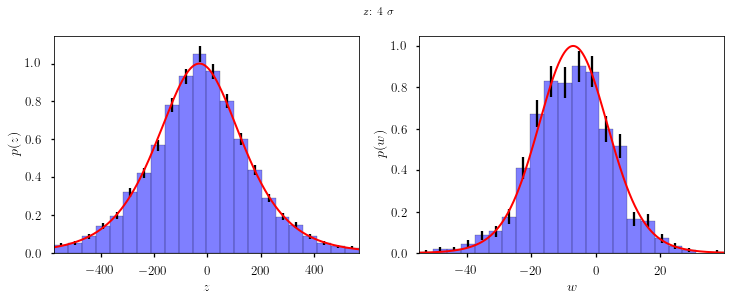

[-547.64229912 -495.82863101 -444.0149629  -392.20129479 -340.38762668
 -288.57395857 -236.76029046 -184.94662235 -133.13295424  -81.31928613
  -29.50561802   22.3080501    74.12171821  125.93538632  177.74905443
  229.56272254  281.37639065  333.19005876  385.00372687  436.81739498
  488.63106309  540.4447312 ]
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_576.hdf5 and w_576.hdf5
5000


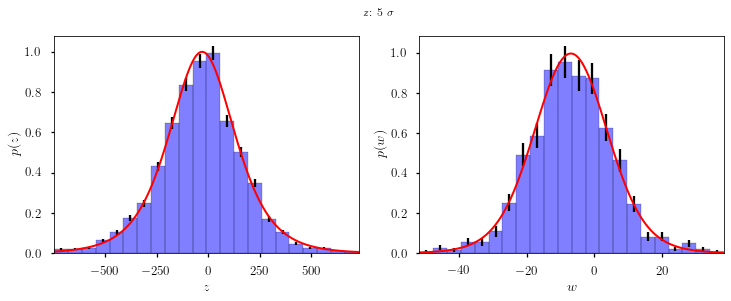

[-713.2249826  -646.15486329 -579.08474398 -512.01462466 -444.94450535
 -377.87438604 -310.80426673 -243.73414741 -176.6640281  -109.59390879
  -42.52378948   24.54632984   91.61644915  158.68656846  225.75668777
  292.82680709  359.8969264   426.96704571  494.03716503  561.10728434
  628.17740365  695.24752296]
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_747.hdf5 and w_747.hdf5


#,zmid,znum,zerr
0,-713.2249826024399,0.021794356334555814,0.005285907835866057
1,-646.1548632897957,0.021794356334555814,0.005285907835866057
2,-579.0847439771514,0.02307637729541204,0.005439154290268378
3,-512.0146246645072,0.062819027081955,0.008974146725993571
4,-444.9445053518629,0.10256167686849796,0.01146674406821646
...,...,...,...
17,426.96704571251234,0.04615275459082408,0.007692125765137347
18,494.0371650251566,0.02564041921712449,0.00573337203410823
19,561.1072843378008,0.02307637729541204,0.005439154290268378
20,628.1774036504451,0.01153818864770602,0.0038460628825686734


In [42]:
import vaex

Nz = 5000
Nw = 1000
burn = 1000
z = chain[burn:, :, 0].flatten()
w = chain[burn:, :, 1].flatten()
for i, zbi in enumerate(zb):
    mask = np.abs(z) < zbi
    z_sample = z[mask]
    index = np.random.randint(0, len(z_sample), Nz)
    z_sample = z_sample[index]

    znum, zedge = np.histogram(z_sample, bins=22)
    dz = zedge[1]-zedge[0]
    zmid = (zedge[:-1]+zedge[1:])/2
    mask = znum > 0
    znum = znum[mask]
    zmid = zmid[mask]
    zerr = np.sqrt(znum)
    max = znum.max()
    znum, zerr = znum/max, zerr/max
    z_tot = znum.sum()*dz
    zdata = (zmid, znum, zerr)
    zs = np.linspace(zedge.min()*1.1, zedge.max()*1.1, 1000)
    fz = dm.fz(zs, theta, psi, zs[1]-zs[0])
    area = simps(fz, zs)
    fz = fz/(area)*z_tot
    max = fz.max()
    fz = fz/max
    znum, zerr = znum/max, zerr/max

    zbound = 50
    mask = np.abs(z) < zbound
    w_sample = w[mask]
    index = np.random.randint(0, len(w_sample), Nw)
    w_sample = w_sample[index]
    wnum, wedge = np.histogram(w_sample, bins=22)
    dw = wedge[1]-wedge[0]
    wmid = (wedge[:-1]+wedge[1:])/2
    mask = wnum > 0
    wnum = wnum[mask]
    wmid = wmid[mask]
    werr = np.sqrt(wnum)
    w_tot = wnum.sum()*dw
    ws = np.linspace(wedge.min(), wedge.max(), 1000)
    fw = dm.fw(ws, theta, psi, ws[1]-ws[0])
    area = simps(fw, ws)
    fw = fw/area*w_tot
    max = fw.max()
    fw = fw/max
    wnum, werr = wnum/max, werr/max
    wdata = (wmid, wnum, werr)

    # plot the data
    print(len(z_sample))
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].bar(zmid, znum, yerr=zerr, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
    axes[0].plot(zs, fz, color='r', lw=2)
    axes[0].set_xlabel(r'$z$')
    axes[0].set_ylabel(r'$p(z)$')
    axes[0].set_xlim(zedge.min(), zedge.max())
    axes[1].bar(wmid, wnum, yerr=werr, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
    axes[1].plot(ws, fw, color='r', lw=2)
    axes[1].set_xlabel(r'$w$')
    axes[1].set_ylabel(r'$p(w)$')
    axes[1].set_xlim(wedge.min(), wedge.max())
    fig.suptitle(r'$z$: {} $\sigma$'.format(i))
    plt.show()
    df_z = vaex.from_arrays(zmid=zmid, znum=znum, zerr=zerr)
    df_w = vaex.from_arrays(wmid=wmid, wnum=wnum, werr=werr)
    print(zmid)
    df_z.export(join(root_dir, 'Data', 'MCMC-no', 'mock', 'data', 'z', f'z_{int(zbi)}.hdf5'), progress=True)
    df_w.export(join(root_dir, 'Data', 'MCMC-no', 'mock', 'data' ,'z', f'w_{int(zbi)}.hdf5'), progress=True)
    print(f"saved z_{int(zbi)}.hdf5 and w_{int(zbi)}.hdf5")
    # break
df_z

# different $N$, $z=2\sigma$

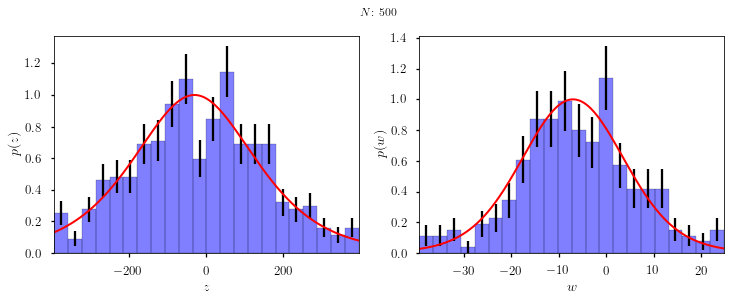

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_00500.hdf5 and w_00500.hdf5


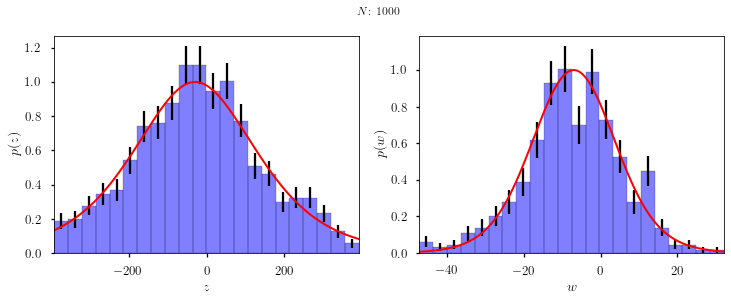

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_01000.hdf5 and w_01000.hdf5


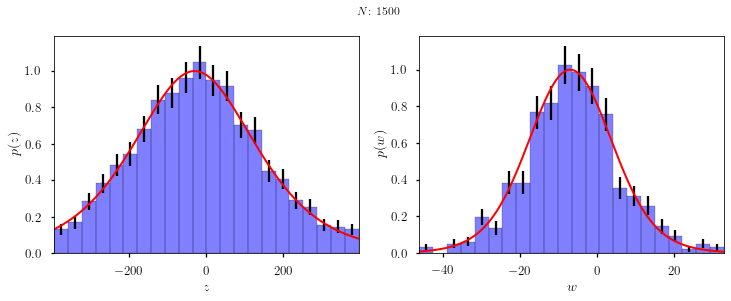

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_01500.hdf5 and w_01500.hdf5


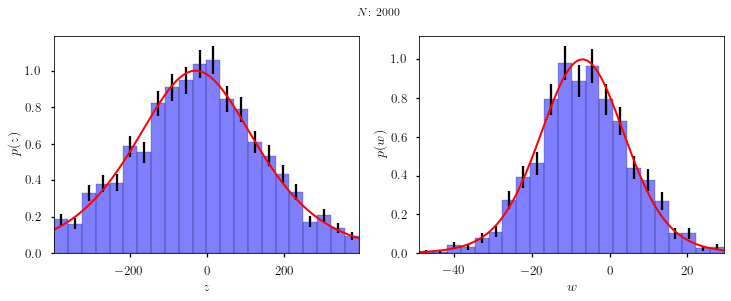

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_02000.hdf5 and w_02000.hdf5


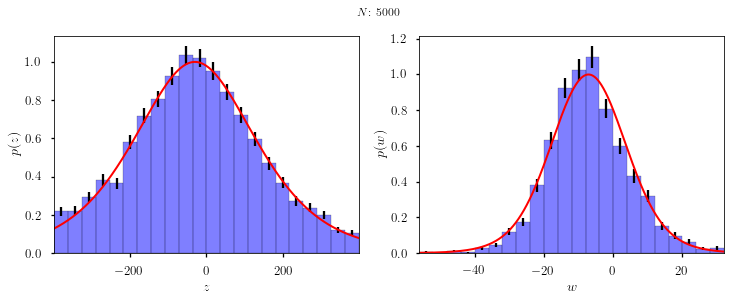

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_05000.hdf5 and w_05000.hdf5


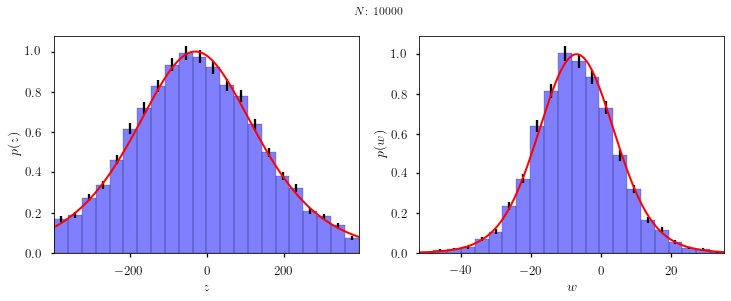

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_10000.hdf5 and w_10000.hdf5


In [43]:
import vaex

zb = 396.44960851

burn = 1000
z = chain[burn:, :, 0].flatten()
w = chain[burn:, :, 1].flatten()
mask = np.abs(z) < zb
z_s = z[mask]
w_s = w[mask]
# for Nz in [500, 1000, 5000, 10_000, 50_000, 100_000]:
for Nz, Nw in [(500, 250), (1000, 500), (1500, 750), (2000, 1000), (5000, 2000), (10_000, 5000)]:
    index = np.random.randint(0, len(z_s), Nz)
    z_sample = z_s[index]
    znum, zedge = np.histogram(z_sample, bins=22)
    dz = zedge[1]-zedge[0]
    zmid = (zedge[:-1]+zedge[1:])/2
    mask = znum > 0
    znum = znum[mask]
    zmid = zmid[mask]
    zerr = np.sqrt(znum)
    max = znum.max()
    znum, zerr = znum/max, zerr/max
    z_tot = znum.sum()*dz
    zdata = (zmid, znum, zerr)
    zs = np.linspace(zedge.min()*1.1, zedge.max()*1.1, 1000)
    fz = dm.fz(zs, theta, psi, zs[1]-zs[0])
    area = simps(fz, zs)
    fz = fz/(area)*z_tot
    max = fz.max()
    fz = fz/max
    znum, zerr = znum/max, zerr/max

    zbound = 50
    mask = np.abs(z_s) < zbound
    w_sample = w_s[mask]
    index = np.random.randint(0, len(w_sample), Nw)
    w_sample = w_sample[index]
    wnum, wedge = np.histogram(w_sample, bins=22)
    dw = wedge[1]-wedge[0]
    wmid = (wedge[:-1]+wedge[1:])/2
    mask = wnum > 0
    wnum = wnum[mask]
    wmid = wmid[mask]
    werr = np.sqrt(wnum)
    w_tot = wnum.sum()*dw
    ws = np.linspace(wedge.min(), wedge.max(), 1000)
    fw = dm.fw(ws, theta, psi, ws[1]-ws[0])
    area = simps(fw, ws)
    fw = fw/area*w_tot
    max = fw.max()
    fw = fw/max
    wnum, werr = wnum/max, werr/max
    wdata = (wmid, wnum, werr)

    # plot the data
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].bar(zmid, znum, yerr=zerr, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
    axes[0].plot(zs, fz, color='r', lw=2)
    axes[0].set_xlabel(r'$z$')
    axes[0].set_ylabel(r'$p(z)$')
    axes[0].set_xlim(zedge.min(), zedge.max())
    axes[1].bar(wmid, wnum, yerr=werr, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
    axes[1].plot(ws, fw, color='r', lw=2)
    axes[1].set_xlabel(r'$w$')
    axes[1].set_ylabel(r'$p(w)$')
    axes[1].set_xlim(wedge.min(), wedge.max())
    fig.suptitle(r'$N$: {}'.format(Nz))
    plt.show()
    df_z = vaex.from_arrays(zmid=zmid, znum=znum, zerr=zerr)
    df_w = vaex.from_arrays(wmid=wmid, wnum=wnum, werr=werr)
    df_z.export(join(root_dir, 'Data', 'MCMC-no', 'mock','data', 'n', f'z_{Nz:05d}.hdf5'), progress=True)
    df_w.export(join(root_dir, 'Data', 'MCMC-no', 'mock','data' ,'n', f'w_{Nz:05d}.hdf5'), progress=True)
    print(f"saved z_{Nz:05d}.hdf5 and w_{Nz:05d}.hdf5")
    # break

# for comparison model

In [41]:
from matplotlib import pyplot as plt
import numpy as np
from os.path import join, abspath
from hammer import dm
from time import time
import pandas as pd
root_dir = abspath(join('..', '..'))
import sys
sys.path.append(root_dir)
import vaex
from scipy.stats import norm
from utils import plot_chain, plot_corner, style

In [2]:
# run this with script, save the chain
# nwalkers = pos.shape[0]
# ndim = pos.shape[1]

# t0 = time()
# chain = dm.sample(1_000_000, nwalkers, pos, theta, dz=1., verbose=True, parallel=True)
# print(time() - t0, "s")

In [43]:
chain = np.load(join(root_dir, 'Data', 'MCMC-no', 'mock', 'data', 'mock', 'chain.npy'))
chain.shape

(1000, 16, 2)

In [45]:
burn = 100
z = chain[burn:, :, 0].flatten()

zfit = norm.fit(z)
zfit

(-18.347832866458383, 176.10645600386678)

In [47]:
zsun

30

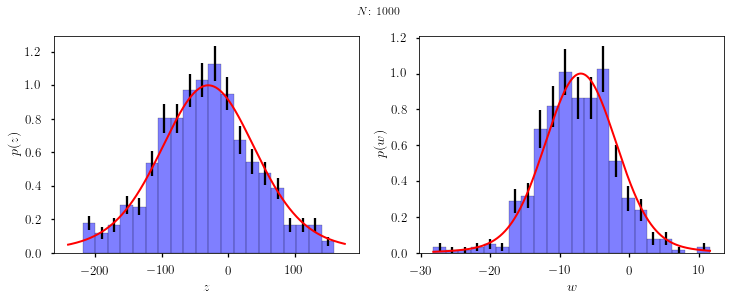

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 z_0001000.hdf5


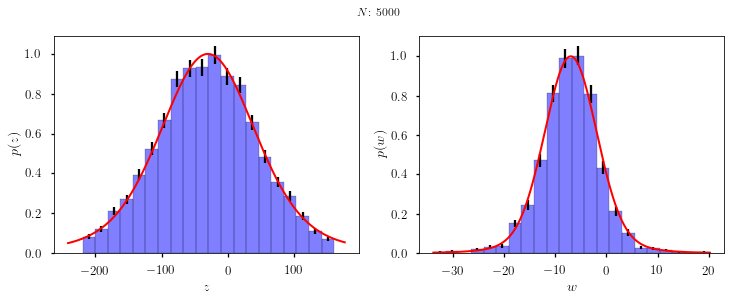

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 z_0005000.hdf5


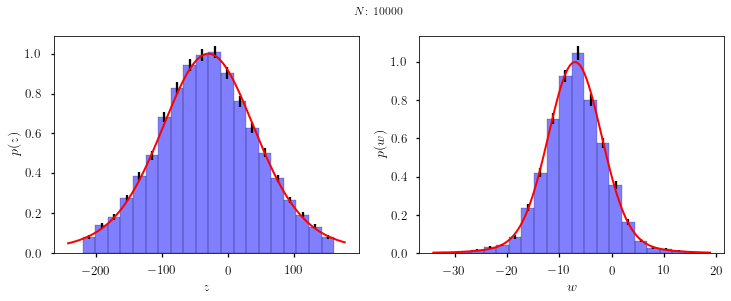

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 z_0010000.hdf5


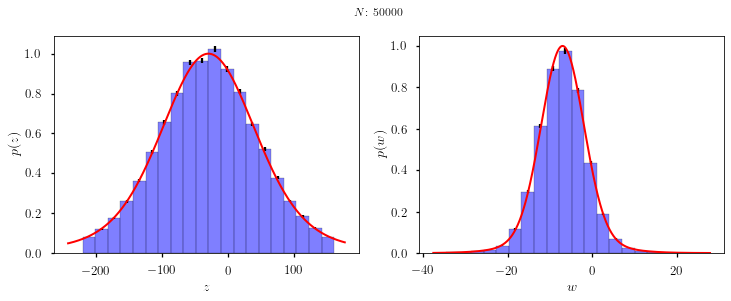

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 z_0050000.hdf5


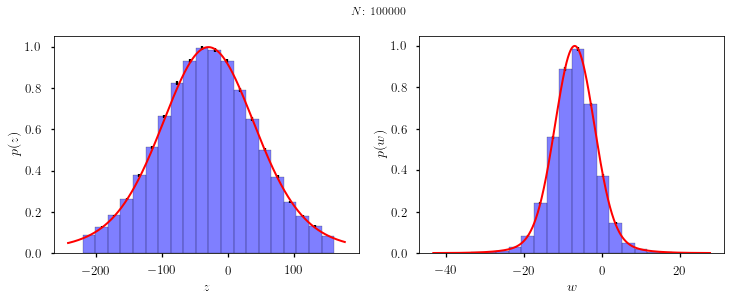

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 z_0100000.hdf5


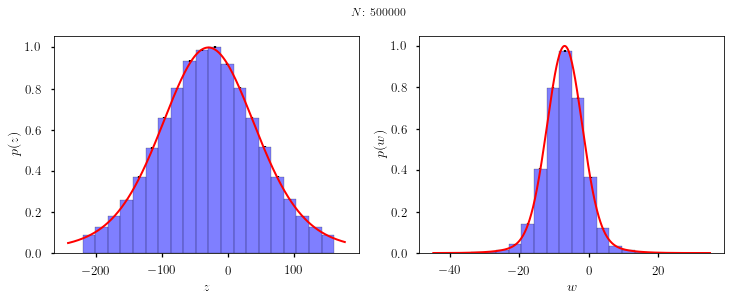

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 z_0500000.hdf5


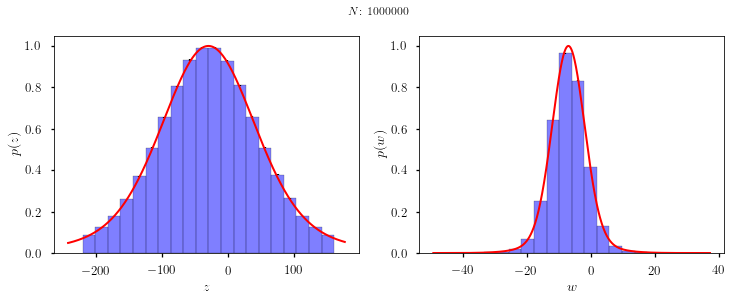

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 z_1000000.hdf5


In [18]:
sigma_z = zfit[1]

burn = 1000
z = chain[burn:, :, 0].flatten()
w = chain[burn:, :, 1].flatten()
mask = np.abs(z+zsun[0]) < 2*sigma_z
z_s = z[mask]
w_s = w[mask]
for Nz in [1000, 5000, 10_000, 50_000, 100_000, 500_000, 1_000_000]:
    index = np.random.randint(0, len(z_s), Nz)
    z_sample = z_s[index]
    w_sample = w_s[index]

    zbound = 50
    mask = np.abs(z_sample) < zbound
    w_sample = w_sample[mask]

    znum, zedge = np.histogram(z_sample, bins=20)
    dz = zedge[1]-zedge[0]
    zmid = (zedge[:-1]+zedge[1:])/2
    mask = znum > 0
    znum = znum[mask]
    zmid = zmid[mask]
    zerr = np.sqrt(znum)
    max = znum.max()
    znum, zerr = znum/max, zerr/max
    z_tot = znum.sum()*dz
    zdata = (zmid, znum, zerr)
    zs = np.linspace(zedge.min()*1.1, zedge.max()*1.1, 1000)
    fz = dm.fz(zs, theta, zs[1]-zs[0])
    area = simps(fz, zs)
    fz = fz/(area)*z_tot
    max = fz.max()
    fz = fz/max
    znum, zerr = znum/max, zerr/max

    wnum, wedge = np.histogram(w_sample, bins=22)
    dw = wedge[1]-wedge[0]
    wmid = (wedge[:-1]+wedge[1:])/2
    mask = wnum > 0
    wnum = wnum[mask]
    wmid = wmid[mask]
    werr = np.sqrt(wnum)
    w_tot = wnum.sum()*dw
    ws = np.linspace(wedge.min(), wedge.max(), 1000)
    fw = dm.fw(ws, theta, ws[1]-ws[0])
    area = simps(fw, ws)
    fw = fw/area*w_tot
    max = fw.max()
    fw = fw/max
    wnum, werr = wnum/max, werr/max
    wdata = (wmid, wnum, werr)

    # plot the data
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].bar(zmid, znum, yerr=zerr, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
    axes[0].plot(zs, fz, color='r', lw=2)
    axes[0].set_xlabel(r'$z$')
    axes[0].set_ylabel(r'$p(z)$')
    axes[1].bar(wmid, wnum, yerr=werr, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
    axes[1].plot(ws, fw, color='r', lw=2)
    axes[1].set_xlabel(r'$w$')
    axes[1].set_ylabel(r'$p(w)$')
    fig.suptitle(r'$N$: {}'.format(Nz))
    plt.show()
    df_z = vaex.from_arrays(zmid=zmid, znum=znum, zerr=zerr)
    df_w = vaex.from_arrays(wmid=wmid, wnum=wnum, werr=werr)
    # break
    df_z.export(join(root_dir, 'Data', 'MCMC', 'dm_mock','mock', 'comp', f'z_{Nz:07d}.hdf5'), progress=True)
    df_w.export(join(root_dir, 'Data', 'MCMC', 'dm_mock','mock' ,'comp', f'w_{Nz:07d}.hdf5'), progress=True)
    print(f"{f'z_{Nz:07d}.hdf5'}")
